In [1]:
from utils import CNC
from types import SimpleNamespace

In [2]:
args = SimpleNamespace(
    file_path = "./data/data.csv",
    model = "logistic_regression",
    future_steps = 1,
    window_size = 30,
    test_size = 0.2,
    seed = 0
)
cnc = CNC(args)

In [3]:
cnc.pre_process()

Creating rolling window features: 100%|██████████| 2358/2358 [00:00<00:00, 3024.07it/s]


In [4]:
cnc.train()

Training models: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


In [5]:
cnc.evaluate()

Report - Future step 1:
              precision    recall  f1-score   support

       False       0.69      0.61      0.65       252
        True       0.61      0.69      0.65       220

    accuracy                           0.65       472
   macro avg       0.65      0.65      0.65       472
weighted avg       0.65      0.65      0.65       472



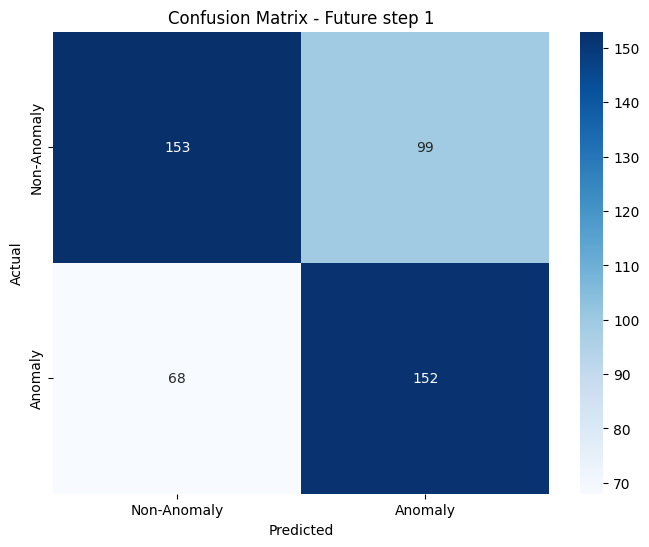

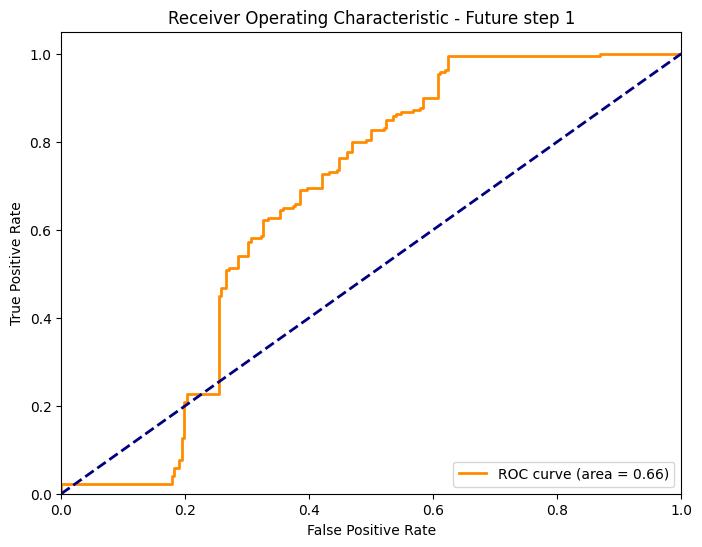

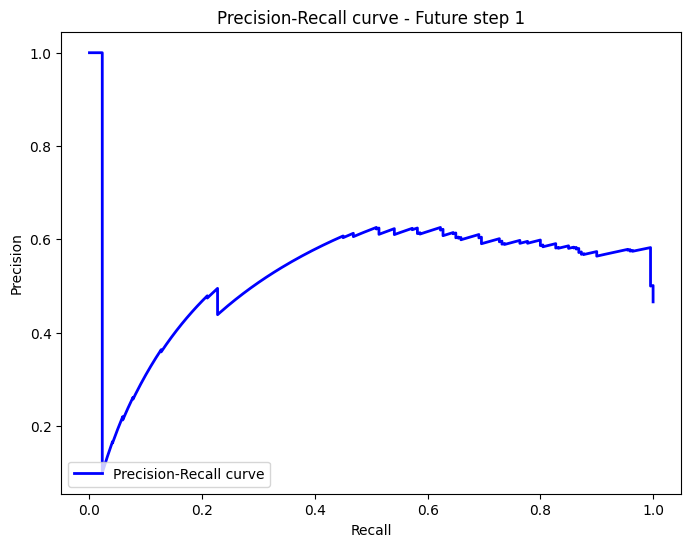

In [6]:
cnc.visualize()